In [4]:
import pickle
import sys
import os
sys.path.append("/".join(os.getcwd().split("/")[:-1]))
sys.path.append("/".join(os.getcwd().split("/")[:-2]))
import common
import torch
from sparsity_levels import *
from tqdm import tqdm

checkpoint_path = "/local/huzaifa/CoreInfer/models/llama3-3b"
dir_path = "/local/huzaifa/CoreInfer/sparsity_levels/llama3-3b/sparsity_levels_files"
model_name = "llama3-3b"
num_neurons = common.MODEL_INFO[model_name]["num_neurons"]
model, tokenizer, num_layers = common.load_model(model_name, 5, 27, checkpoint_path, "cpu", None)

Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]


Done. Loaded model in 20.02 seconds.



## Calculate Avg Levels

In [18]:
truthfulqa_avg_levels = calculate_avg_levels("truthfulqa_gen")
bertaqa_en_avg_levels = calculate_avg_levels("bertaqa_en")
squadv2_avg_levels = calculate_avg_levels("squadv2")
commonsense_qa_avg_levels = calculate_avg_levels("commonsense_qa")
triviaqa_avg_levels = calculate_avg_levels("triviaqa")
wmt_avg_levels = calculate_avg_levels("wmt16-de-en")

## Save Levels

In [24]:
avg_sparsity_levels_path = dir_path + "/sparsity_levels_avg"

save_levels([truthfulqa_avg_levels], "truthfulqa_gen", avg_sparsity_levels_path)
save_levels([bertaqa_en_avg_levels], "bertaqa_en", avg_sparsity_levels_path)
save_levels([squadv2_avg_levels], "squadv2", avg_sparsity_levels_path)
save_levels([commonsense_qa_avg_levels], "commonsense_qa", avg_sparsity_levels_path)
save_levels([triviaqa_avg_levels], "triviaqa", avg_sparsity_levels_path)
save_levels([wmt_avg_levels], "wmt16-de-en", avg_sparsity_levels_path)

## Compare Avg Levels for Each Dataset

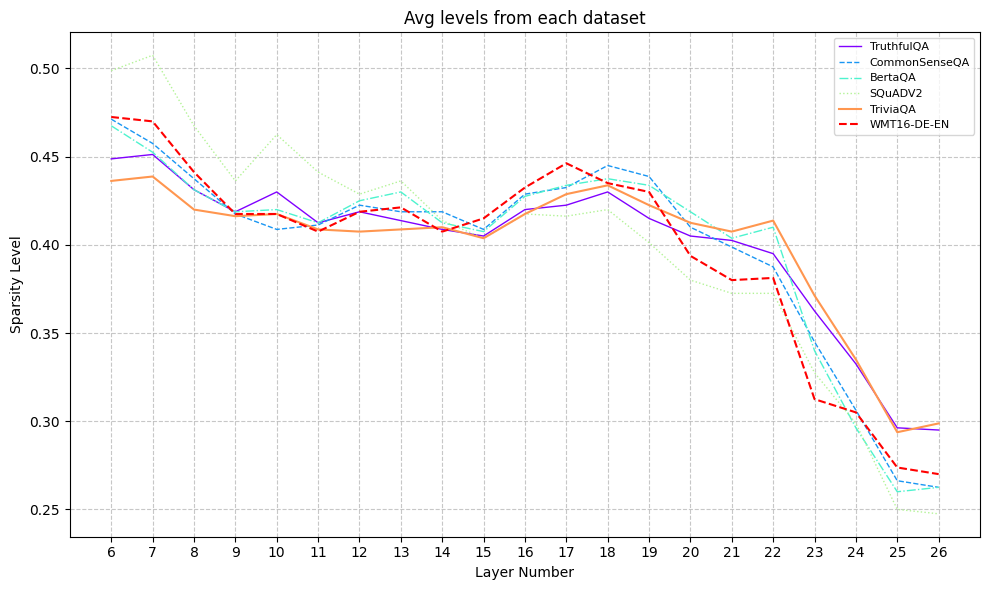

In [22]:
# Pick the first levels from each dataset
different_levels = [truthfulqa_avg_levels, commonsense_qa_avg_levels, bertaqa_en_avg_levels, squadv2_avg_levels, triviaqa_avg_levels, wmt_avg_levels]
draw_levels(different_levels, "Avg levels from each dataset", ["TruthfulQA", "CommonSenseQA", "BertaQA", "SQuADV2", "TriviaQA", "WMT16-DE-EN"])

## Actual Sparsity

In [5]:
from sparsity_levels import create_md_table_for_results

create_md_table_for_results(model_name, dir_path + "/lm_eval_results_avg/lm_eval_metrics", dir_path + "/lm_eval_results_avg/indices_all.txt")

### wmt16-de-en

| Levels | Actual Sparsity | Metric Value |
| --- | --- | --- |
| sparsity_levels0.pkl | 0.398 | 3.485 |

### squadv2

| Levels | Actual Sparsity | Metric Value |
| --- | --- | --- |
| sparsity_levels0.pkl | 0.4 | 16.4 |

### truthfulqa_gen

| Levels | Actual Sparsity | Metric Value |
| --- | --- | --- |
| sparsity_levels0.pkl | 0.401 | 6.446 |

### bertaqa_en

| Levels | Actual Sparsity | Metric Value |
| --- | --- | --- |
| sparsity_levels0.pkl | 0.4 | 0.575 |

### commonsense_qa

| Levels | Actual Sparsity | Metric Value |
| --- | --- | --- |
| sparsity_levels0.pkl | 0.4 | 0.653 |

### triviaqa

| Levels | Actual Sparsity | Metric Value |
| --- | --- | --- |
| sparsity_levels0.pkl | 0.4 | 0.257 |

